In [93]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.colors as mc

In [73]:
ds = xr.open_dataset('C:/Users/taiwoajayi/Documents/Grace/GRCTellus.JPL.200204_202306.GLO.RL06.1M.MSCNv03CRI.nc')
ds

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 222, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2023-06-16
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    land_mask      (lat, lon) float64 ...
    scale_factor   (lat, lon) float64 ...
    mascon_ID      (lat, lon) float64 ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06.1Mv03 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2023-08-30T13:08:07Z

In [74]:
ds2 = xr.open_dataset('C:/Users/taiwoajayi/Documents/Grace/GRCTellus.JPL.200204_202306.GLO.RL06.1M.MSCNv03CRII.nc')
ds2

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 222, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2023-06-16
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    land_mask      (lat, lon) float64 ...
    scale_factor   (lat, lon) float64 ...
    mascon_ID      (lat, lon) float64 ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06.1Mv03 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2023-08-30T13:08:07Z

In [75]:
Time = ds['time']
Time

<xarray.DataArray 'time' (time: 222)>
array(['2002-04-17T12:00:00.000000000', '2002-05-10T12:00:00.000000000',
       '2002-08-16T12:00:00.000000000', ..., '2023-04-16T00:00:00.000000000',
       '2023-05-16T12:00:00.000000000', '2023-06-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2002-04-17T12:00:00 ... 2023-06-16
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    bounds:         time_bounds

In [76]:
# Assuming 'time' is a coordinate in the dataset
selected = ds.sel(time=slice('2022-01-01', '2022-12-24'))
selected
# Assuming 'lat' and 'lon' are coordinates in the dataset
selected_day = selected.sel(lon=slice(60,100), lat=slice(5,40))
selected_day


<xarray.Dataset>
Dimensions:        (lon: 80, lat: 70, time: 12, bounds: 2)
Coordinates:
  * lon            (lon) float64 60.25 60.75 61.25 61.75 ... 98.75 99.25 99.75
  * lat            (lat) float64 5.25 5.75 6.25 6.75 ... 38.25 38.75 39.25 39.75
  * time           (time) datetime64[ns] 2022-01-16T12:00:00 ... 2022-12-16T1...
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    land_mask      (lat, lon) float64 ...
    scale_factor   (lat, lon) float64 ...
    mascon_ID      (lat, lon) float64 ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06.1Mv03 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2023-08-30T13:08:07Z

In [77]:
# Assuming 'time' is a coordinate in the dataset
selected1 = ds2.sel(time=slice('2022-01-01', '2022-12-24'))
selected1
selected_day1 = selected1.sel(lon=slice(-85+180,-30+180), lat=slice(-40,15))
selected_day1


<xarray.Dataset>
Dimensions:        (lon: 110, lat: 110, time: 12, bounds: 2)
Coordinates:
  * lon            (lon) float64 95.25 95.75 96.25 96.75 ... 148.8 149.2 149.8
  * lat            (lat) float64 -39.75 -39.25 -38.75 ... 13.75 14.25 14.75
  * time           (time) datetime64[ns] 2022-01-16T12:00:00 ... 2022-12-16T1...
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 ...
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 ...
    lon_bounds     (lon, bounds) float64 ...
    time_bounds    (time, bounds) datetime64[ns] ...
    land_mask      (lat, lon) float64 ...
    scale_factor   (lat, lon) float64 ...
    mascon_ID      (lat, lon) float64 ...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06.1Mv03 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2023-08-30T13:08:07Z

In [78]:

# Select the data within the specified time range
selected_data1 = selected_day1['lwe_thickness']

# Group by month and calculate the monthly zonal mean along the latitude dimension
monthly_zonal_mean1 = selected_data1.groupby('time.month').mean(dim=['lat', 'lon'])

# Get the latitude values
latitudes1 = monthly_zonal_mean1['time']

In [79]:
monthly_zonal_mean1

<xarray.DataArray 'lwe_thickness' (time: 12)>
array([3.32785383, 4.48618461, 3.51801436, 2.08407297, 2.58838082,
       3.56769066, 4.82400046, 4.25169418, 4.74249722, 5.65986471,
       5.36405399, 5.22856773])
Coordinates:
  * time     (time) datetime64[ns] 2022-01-16T12:00:00 ... 2022-12-16T12:00:00
Attributes:
    units:          cm
    long_name:      Liquid_Water_Equivalent_Thickness
    standard_name:  Liquid_Water_Equivalent_Thickness
    grid_mapping:   WGS84
    valid_min:      -2001.748614238989
    valid_max:      972.7522350861174
    comment:        Coastline Resolution Improvement (CRI) filter is applied

In [80]:
sel = selected_day['scale_factor']
sel1 = selected_day1['scale_factor']
sel1

<xarray.DataArray 'scale_factor' (lat: 110, lon: 110)>
[12100 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 95.25 95.75 96.25 96.75 ... 148.2 148.8 149.2 149.8
  * lat      (lat) float64 -39.75 -39.25 -38.75 -38.25 ... 13.75 14.25 14.75
Attributes:
    units:          dimensionless
    long_name:      Scale_Factor_CRI
    standard_name:  Scale_Factor_CRI
    valid_min:      -99999.0
    valid_max:      24.133988467789724
    description:    Gridded scale factors to be used with mascon solution tha...

In [81]:
# Select the data within the specified time range
selected_data = selected_day['lwe_thickness']

# Group by month and calculate the monthly zonal mean along the latitude dimension
monthly_zonal_mean = selected_data.groupby('time.month').mean(dim=['lat', 'lon'])

# Get the latitude values
latitudes = monthly_zonal_mean['time']

In [82]:
lon = selected_day['lon']
lat = selected_day['lat']
lon1 = selected_day1['lon']
lat1 = selected_day1['lat']

In [83]:
monthly_zonal_mean

<xarray.DataArray 'lwe_thickness' (time: 12)>
array([-2.7526535 , -4.64792975, -6.34617085, -7.04474323, -7.21628993,
       -4.61871776, -0.95486205,  2.68666191,  2.55343498,  1.92498183,
       -0.8520394 , -2.57079068])
Coordinates:
  * time     (time) datetime64[ns] 2022-01-16T12:00:00 ... 2022-12-16T12:00:00
Attributes:
    units:          cm
    long_name:      Liquid_Water_Equivalent_Thickness
    standard_name:  Liquid_Water_Equivalent_Thickness
    grid_mapping:   WGS84
    valid_min:      -2001.748614238989
    valid_max:      972.7522350861174
    comment:        Coastline Resolution Improvement (CRI) filter is applied

In [84]:
result = np.diff(monthly_zonal_mean)
result

array([-1.89527625, -1.69824111, -0.69857238, -0.1715467 ,  2.59757216,
        3.66385571,  3.64152396, -0.13322693, -0.62845316, -2.77702123,
       -1.71875127])

In [85]:

result1 = np.diff(monthly_zonal_mean1)
result1

array([ 1.15833078, -0.96817025, -1.43394139,  0.50430785,  0.97930984,
        1.2563098 , -0.57230628,  0.49080304,  0.91736749, -0.29581072,
       -0.13548626])

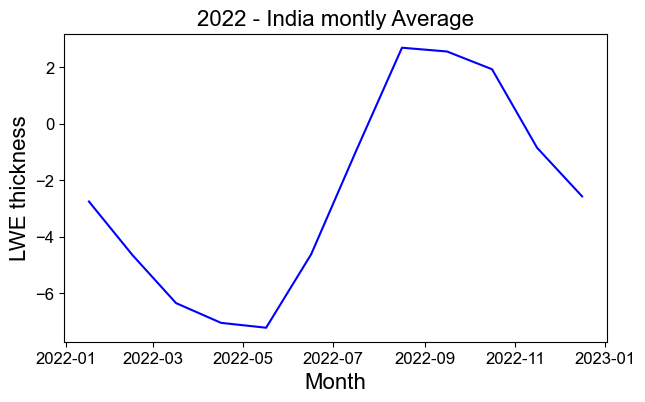

In [86]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12

# Calculate the annual zonal mean by averaging all months
#annual_zonal_mean = monthly_zonal_mean.mean(dim='time')

# Plot the annual zonal mean with latitude on the x-axis
plt.figure(figsize=(7, 4))
plt.plot(latitudes, monthly_zonal_mean,color='blue')

plt.xlabel('Month', fontsize=16)
plt.ylabel('LWE thickness', fontsize=16)
plt.title('2022 - India montly Average', fontsize=16)
#plt.grid(False, which='major',linestyle='--')
plt.show()

In [87]:
# Create x-axis values from 1 to 10
latitudess = latitudes[:len(result)]
latitudess1 = latitudes1[:len(result1)]

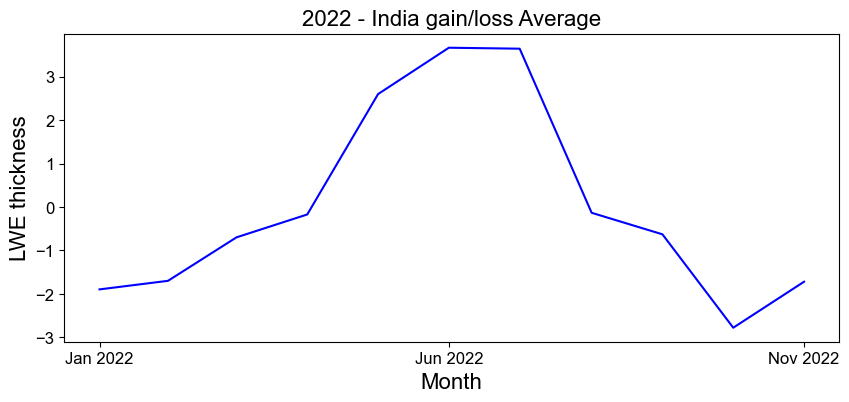

In [88]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12

fig, ax = plt.subplots(figsize = (10, 4))

# Plot the annual zonal mean with latitude on the x-axis
plt.plot(latitudess, result,color='blue')
n = 5  # Show every 30th label (adjust this as needed)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(latitudess[::n])
plt.xlabel('Month', fontsize=16)
plt.ylabel('LWE thickness', fontsize=16)
plt.title('2022 - India gain/loss Average', fontsize=16)
#plt.grid(False, which='major',linestyle='--')
plt.show()

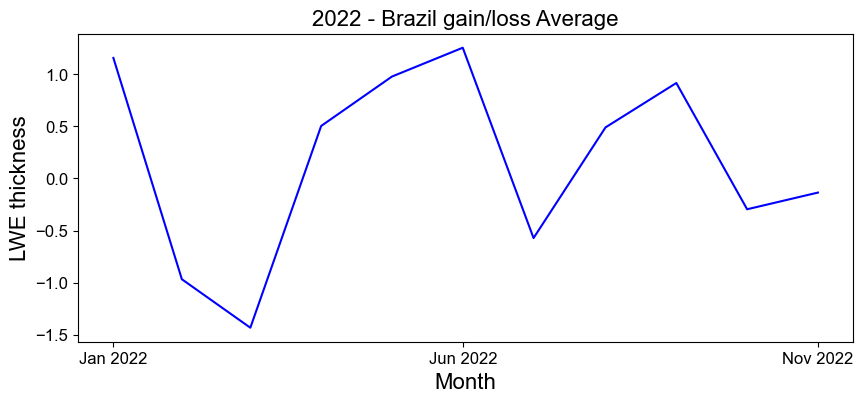

In [89]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12

fig, ax = plt.subplots(figsize = (10, 4))

# Plot the annual zonal mean with latitude on the x-axis
plt.plot(latitudess1, result1,color='blue')
n = 5  # Show every 30th label (adjust this as needed)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(latitudess[::n])
plt.xlabel('Month', fontsize=16)
plt.ylabel('LWE thickness', fontsize=16)
plt.title('2022 - Brazil gain/loss Average', fontsize=16)
#plt.grid(False, which='major',linestyle='--')
plt.show()

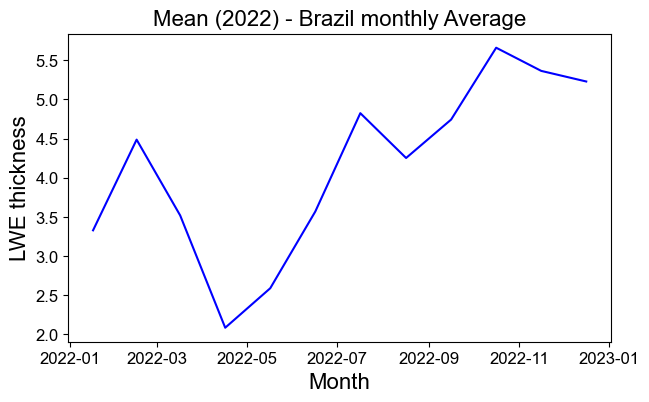

In [90]:
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 12

# Calculate the annual zonal mean by averaging all months
#annual_zonal_mean = monthly_zonal_mean.mean(dim='time')

# Plot the annual zonal mean with latitude on the x-axis
plt.figure(figsize=(7, 4))
plt.plot(latitudes1, monthly_zonal_mean1,color='blue')

plt.xlabel('Month', fontsize=16)
plt.ylabel('LWE thickness', fontsize=16)
plt.title('Mean (2022) - Brazil monthly Average', fontsize=16)
#plt.grid(False, which='major',linestyle='--')
plt.show()

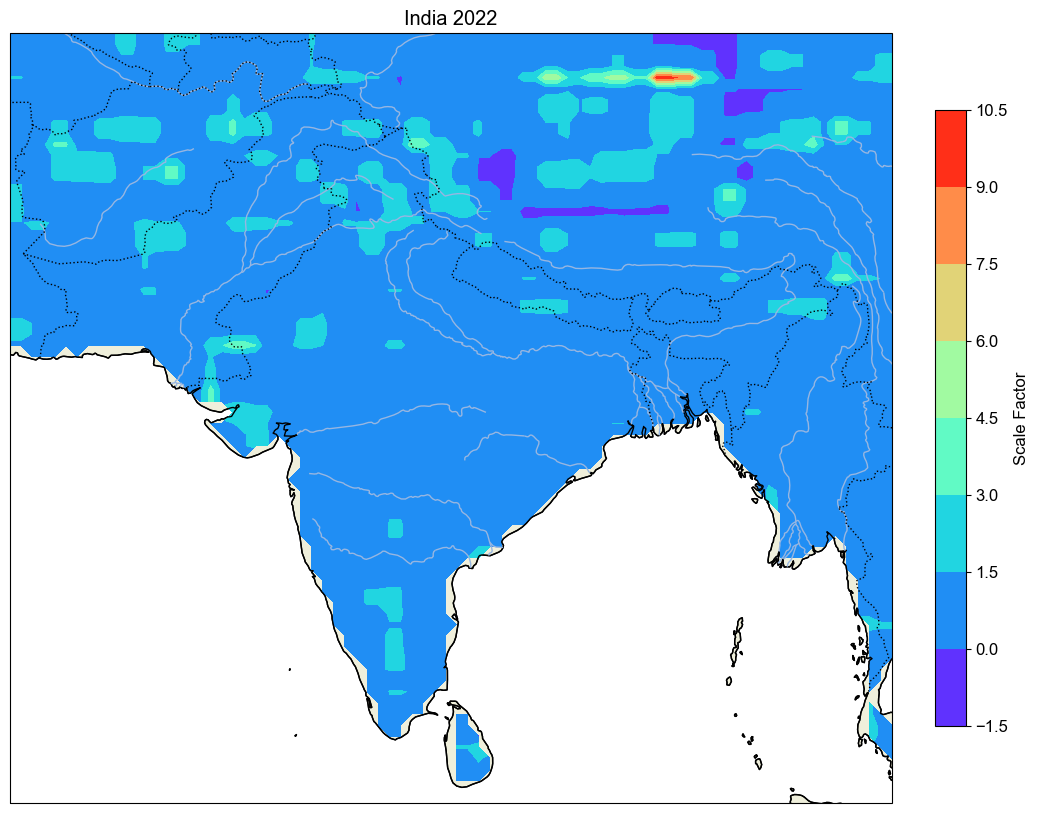

In [91]:
# Create a figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(28, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the map
c = ax.contourf(lon, lat, sel, cmap='rainbow', transform=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Add colorbar
cb = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.02, shrink=0.8, label='Scale Factor')

# Set plot title and labels
plt.title('India 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

# Don't forget to close the NetCDF4 file when you're done


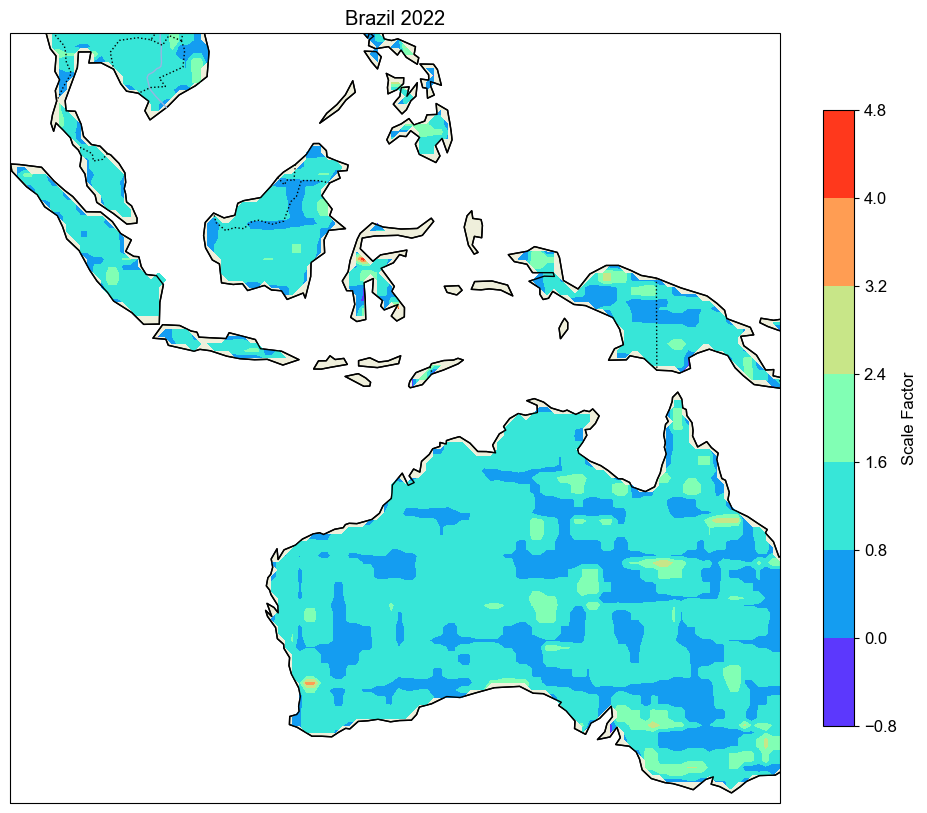

In [92]:
# Create a figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(28, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data on the map
c = ax.contourf(lon1, lat1, sel1, cmap='rainbow', transform=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Add colorbar
cb = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.02, shrink=0.8, label='Scale Factor')

# Set plot title and labels
plt.title('Brazil 2022')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

# Don't forget to close the NetCDF4 file when you're done
